# Задание 1. Пункт 1
Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.
Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).
Визуализировать распределения классов на всех парах переменных.


In [40]:
from sklearn import datasets
import seaborn as sns

Загружаем датасет из либы sklearn.
Ставим a_frame=True,чтобы сразу получить в поле iris.frame DataFrame

In [41]:
iris = datasets.load_iris(as_frame=True)
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Строим корреляцию между переменными по всей таблице. 
Столбец target (это наши классы) нас не интересует

In [42]:
all_corr = iris.frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
print("Корреляция между переменными на всей таблице:")
print(all_corr)

Корреляция между переменными на всей таблице:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Строим корреляцию между переменными по каждому классу. 
Столбец target (это наши классы) нас так же не интересует

Для группировки используем groupby

In [43]:
grouped = iris.frame.groupby('target')
for target, group in grouped:
    corr_group = group[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
    print(f"Корреляция между переменными для класса {iris.target_names[target]} (target = {target}):")
    print(corr_group)
    print("\n\n")

Корреляция между переменными для класса setosa (target = 0):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.742547           0.267176   
sepal width (cm)            0.742547          1.000000           0.177700   
petal length (cm)           0.267176          0.177700           1.000000   
petal width (cm)            0.278098          0.232752           0.331630   

                   petal width (cm)  
sepal length (cm)          0.278098  
sepal width (cm)           0.232752  
petal length (cm)          0.331630  
petal width (cm)           1.000000  



Корреляция между переменными для класса versicolor (target = 1):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000          0.525911           0.754049   
sepal width (cm)            0.525911          1.000000           0.560522   
petal length (cm)           0.754049          0.560522          

Строим распределение всего от всего при помощи pairplot

D:\NikFive\NSU\Machine Learning\ml-course\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\NikFive\NSU\Machine Learning\ml-course\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\NikFive\NSU\Machine Learning\ml-course\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\NikFive\NSU\Machine Learning\ml-course\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

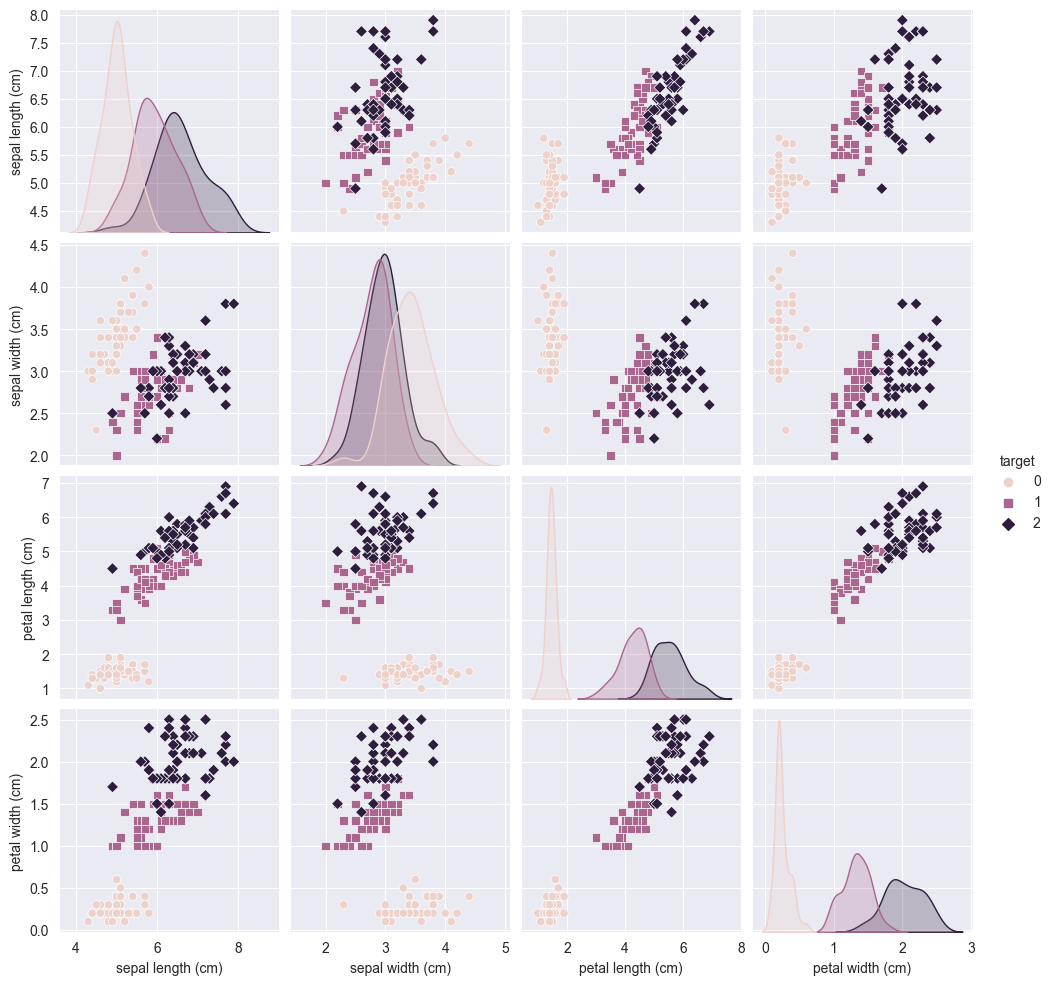

In [44]:
sns.pairplot(iris.frame, hue = 'target', markers=["o", "s", "D"])